# South Asia Violin Plots
## Python for Data Science
**Objective:** Generate violin plots for expenditures per capita for every survey available in South Asia by urban/rural.

**Author:** Francisco Javier Parada Gomez Urquiza <fparadagomezurqu@worldbank.org>

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})

In [2]:
pth = r'C:\Users\WB459082\Documents\project'

In [3]:
fil = 'sar_welfare.csv'

In [4]:
loc = os.path.join(pth, fil)

In [5]:
df = pd.read_csv(loc)

In [6]:
df.columns

Index(['country', 'year', 'urban', 'relationharm', 'male', 'ln_welfare',
       'ln_welfare_perc', 'country_year'],
      dtype='object')

In [7]:
len(df)

4324279

In [8]:
df.head(5)
df.dtypes

country             object
year                 int64
urban               object
relationharm        object
male                object
ln_welfare         float64
ln_welfare_perc    float64
country_year        object
dtype: object

In [9]:
df['country_year']=df['country'].str.cat(df['year'].astype(str),sep='_')
df=df.sort_values(by=['country_year'])


In [10]:
df.country_year.value_counts(
    normalize=True,
    sort=True,
    ascending=False,
    bins=None,
    dropna=True,
)

IND_2004    0.141003
IND_1993    0.130490
IND_2009    0.108354
IND_2011    0.107523
BGD_2016    0.043024
AFG_2011    0.036821
PAK_2015    0.036454
AFG_2007    0.035216
PAK_2013    0.027523
PAK_2001    0.026491
PAK_2005    0.025648
PAK_2010    0.025191
PAK_2007    0.024776
PAK_2011    0.024627
PAK_2004    0.023569
LKA_2016    0.019185
LKA_2009    0.018702
LKA_2012    0.018624
LKA_2006    0.017748
LKA_2002    0.016487
BGD_2010    0.012853
BTN_2007    0.011370
BGD_2005    0.011324
BTN_2017    0.011303
BTN_2012    0.009299
BGD_2000    0.008907
NPL_2010    0.008051
MDV_2016    0.006018
NPL_2003    0.004979
BTN_2003    0.004451
MDV_2009    0.002680
MDV_2002    0.001310
Name: country_year, dtype: float64

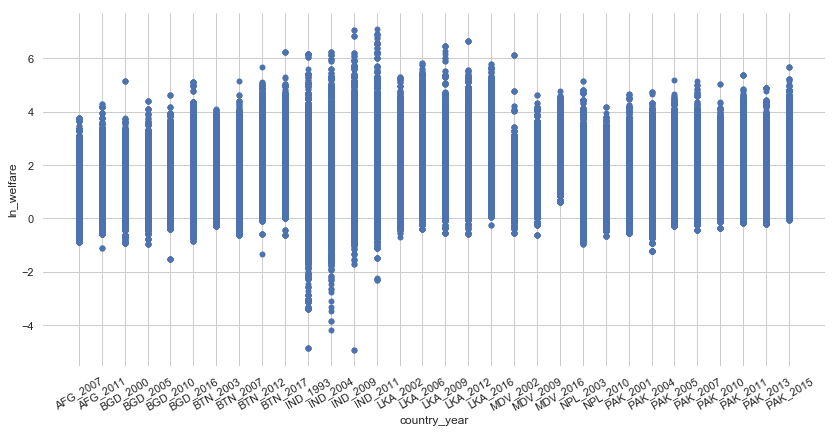

In [11]:
## https://seaborn.pydata.org/examples/different_scatter_variables.html
    
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6.5))
plt.xticks(rotation=30)

sns.despine(f, left=True, bottom=True)

g=sns.scatterplot(x="country_year", 
                y="ln_welfare",
                palette="ch:r=-.2,d=.3_r",
                linewidth=0,
                data=df, 
                ax=ax)


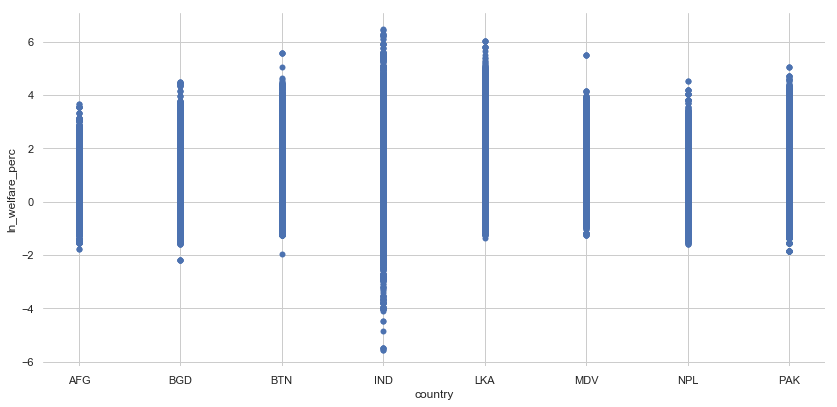

In [12]:
## https://seaborn.pydata.org/examples/different_scatter_variables.html
    
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="country", 
                y="ln_welfare_perc",
                palette="ch:r=-.2,d=.3_r",
                linewidth=0,
                data=df, 
                ax=ax)

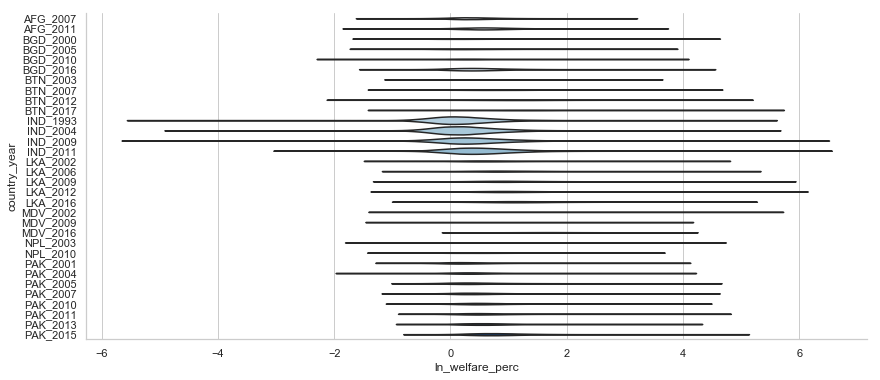

In [15]:
f, ax = plt.subplots(figsize=(14, 6))

sns.set(style="whitegrid")

sns.violinplot(x="ln_welfare_perc", 
               y="country_year", #disrupted_30_pct_plus
               data = df, 
               palette = "Blues", 
               scale = 'count',
               inner = None) # or, None, or "box", or "quartile"

sns.despine(left=False)

### Violin plots for South Asia Region

In [16]:
# Calculate number of obs per group & median to position labels
medians = df.groupby(['country_year'])['ln_welfare_perc'].median().values
nobs = df['ln_welfare_perc'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

In [17]:
# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df2 = pd.DataFrame(dict(x=x, g=g))
m = df2.g.map(ord)
df2["x"] += m
df2.head()



,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E


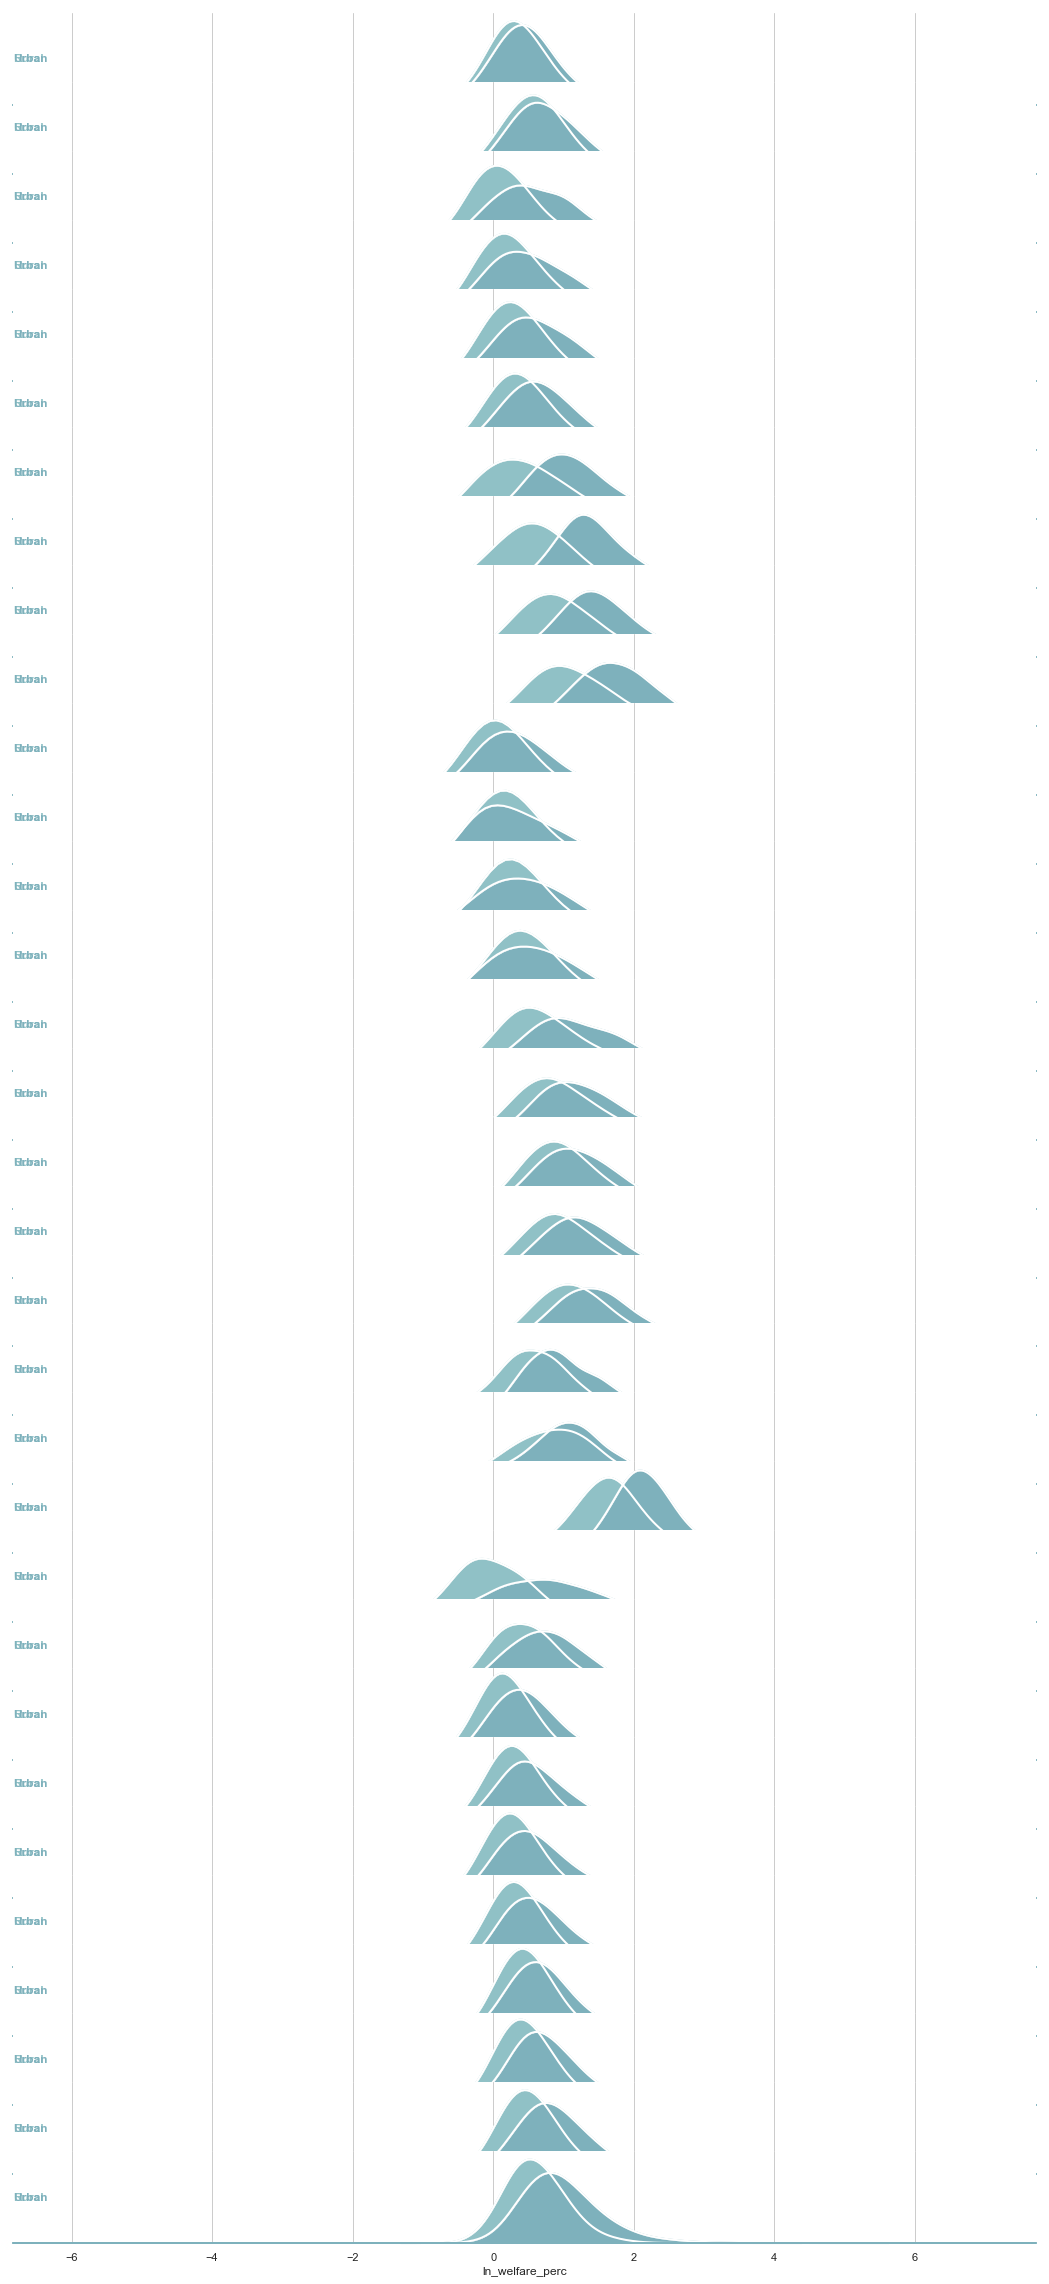

In [19]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="country_year", hue="urban", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "ln_welfare_perc", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "ln_welfare_perc", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(ln_welfare_perc, color, label):
    ax = plt.gca()
    ax.text(0, .5, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "ln_welfare_perc")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

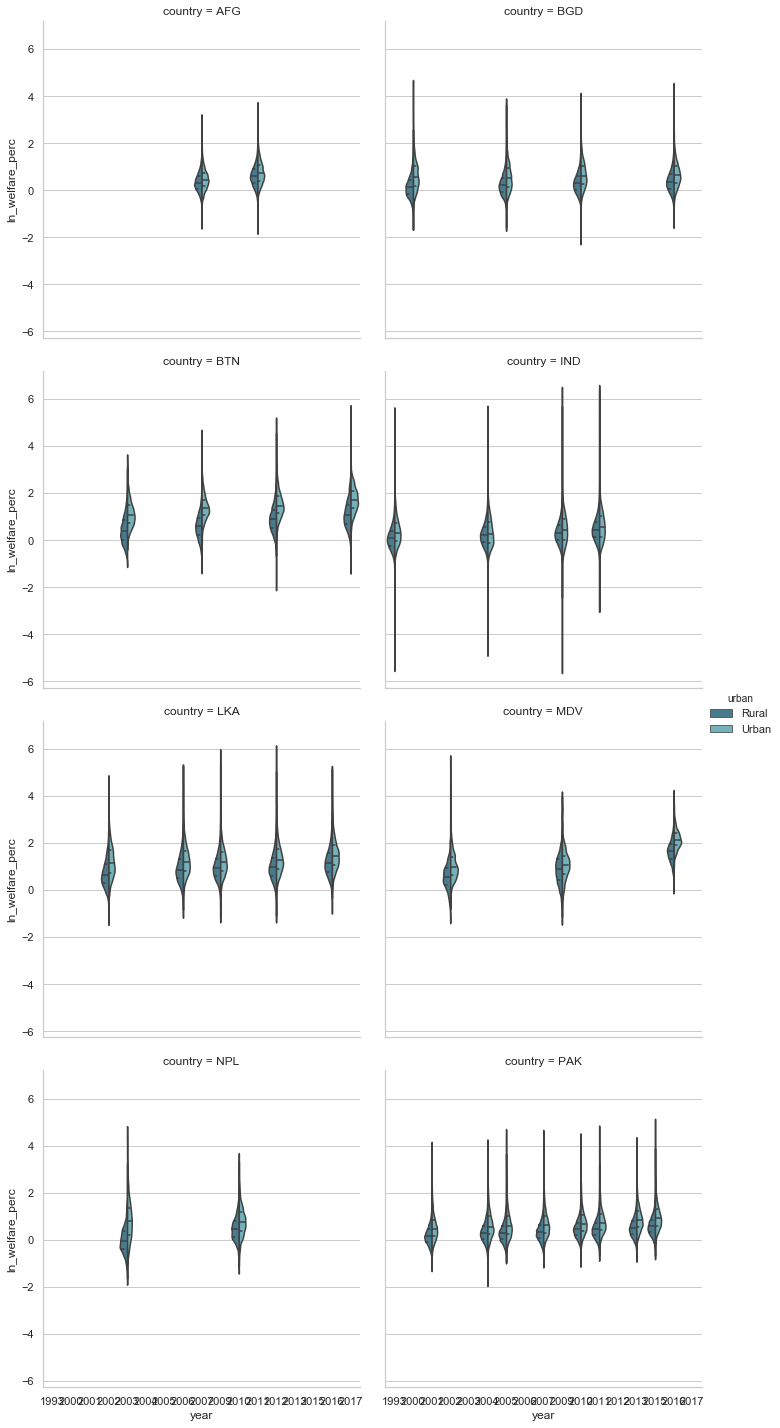

In [20]:
g = sns.catplot(x="year",
                y="ln_welfare_perc",
                hue='urban',
                col='country',
                col_wrap=2,
                data=df,
                palette = "GnBu_d",
                kind="violin",
                split = True,
                inner = "quart",
                orient="v"
)

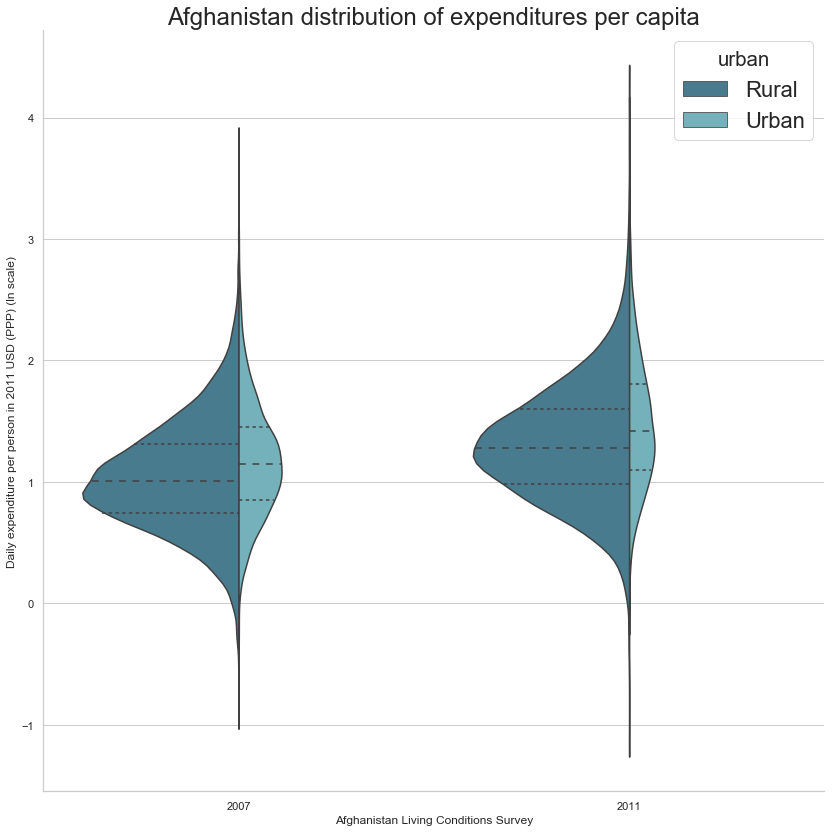

In [21]:
df_afg = df.loc[(df.country =='AFG') & (df.relationharm =='Head of household')]
df_afg = df_afg.sort_values(by='urban')

f, ax = plt.subplots(figsize=(14, 14))

sns.set(style="whitegrid",font_scale=2)

sns.violinplot(y="ln_welfare", 
               x="year", 
               hue = 'urban',
               data = df_afg, 
               palette = "GnBu_d",
               scale = 'count',
               split = True,
               inner = "quart") # or, None, or "box", or "quartile"

sns.despine(left=False)
plt.xlabel('Afghanistan Living Conditions Survey')
plt.ylabel('Daily expenditure per person in 2011 USD (PPP) (ln scale)')
plt.title('Afghanistan distribution of expenditures per capita')
plt.savefig("afghanistan_violins.png")

#pos = range(len(nobs))
#for tick,label in zip(pos,ax.get_xticklabels()):
#   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')


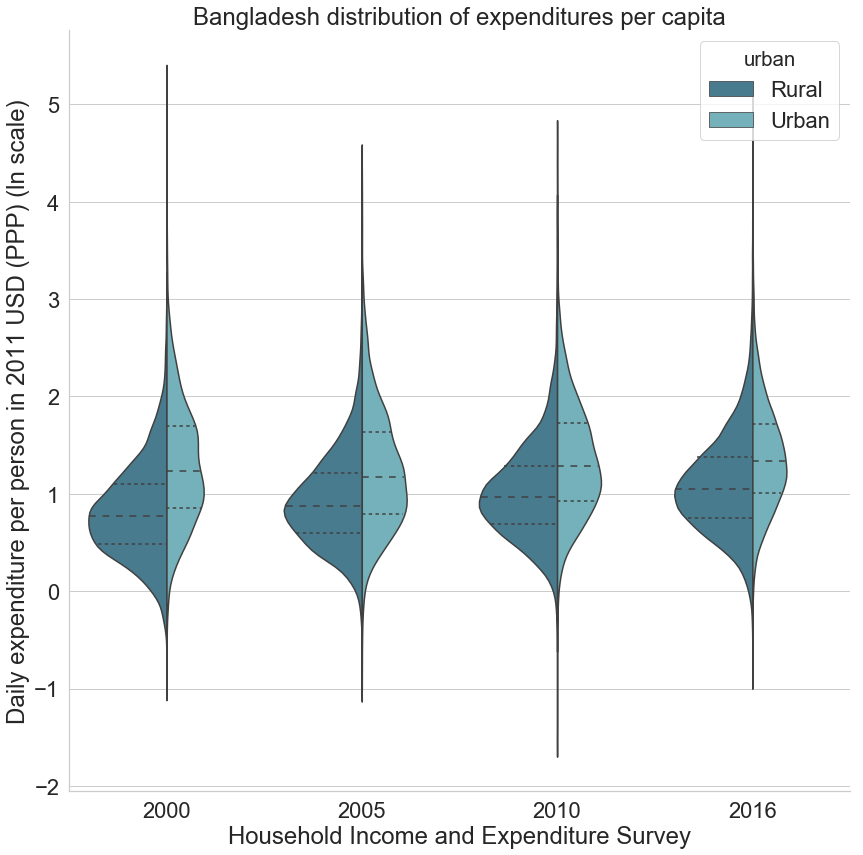

In [22]:
df_bgd = df.loc[(df.country =='BGD') & (df.relationharm =='Head of household')]
df_bgd = df_bgd.sort_values(by='urban')

f, ax = plt.subplots(figsize=(14, 14))

sns.set(style="whitegrid",font_scale=2)

sns.violinplot(y="ln_welfare", 
               x="year", 
               hue = 'urban',
               data = df_bgd, 
               palette = "GnBu_d",
               scale = 'count',
               split = True,
               inner = "quart") # or, None, or "box", or "quartile"

sns.despine(left=False)
plt.xlabel('Household Income and Expenditure Survey')
plt.ylabel('Daily expenditure per person in 2011 USD (PPP) (ln scale)')
plt.title('Bangladesh distribution of expenditures per capita')
plt.savefig("bangladesh_violins.png")

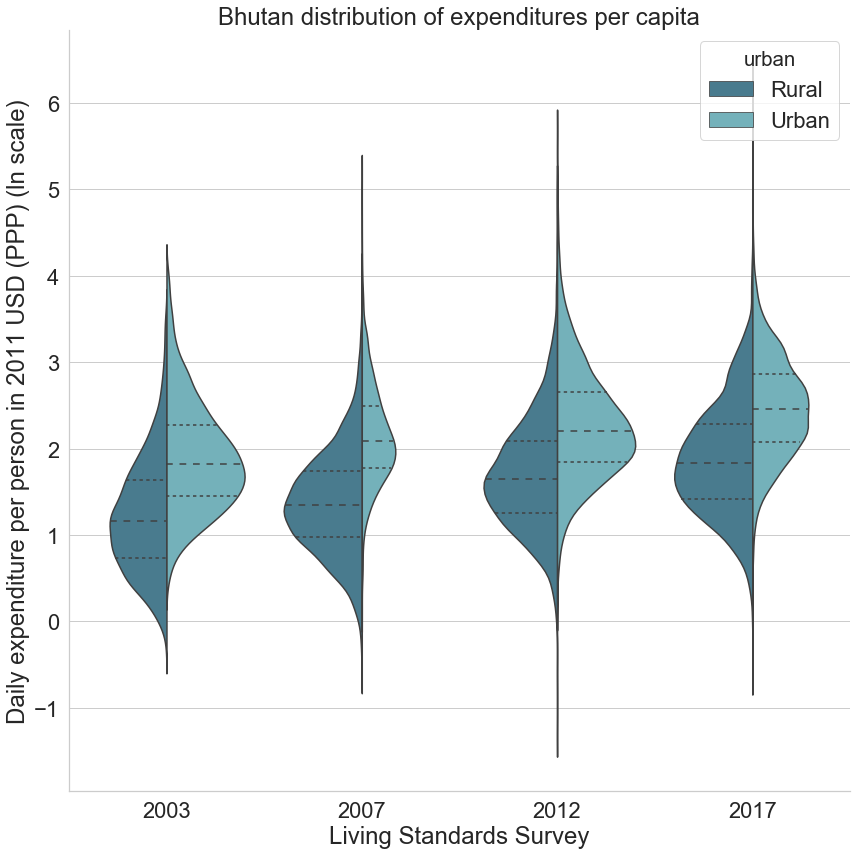

In [23]:
df_btn = df.loc[(df.country =='BTN') & (df.relationharm =='Head of household')]
df_btn = df_btn.sort_values(by='urban')

f, ax = plt.subplots(figsize=(14, 14))

sns.set(style="whitegrid",font_scale=2)

sns.violinplot(y="ln_welfare", 
               x="year", 
               hue = 'urban',
               data = df_btn, 
               palette = "GnBu_d",
               scale = 'count',
               split = True,
               inner = "quart") # or, None, or "box", or "quartile"

sns.despine(left=False)
plt.xlabel('Living Standards Survey')
plt.ylabel('Daily expenditure per person in 2011 USD (PPP) (ln scale)')
plt.title('Bhutan distribution of expenditures per capita')
plt.savefig("bhutan_violins.png")

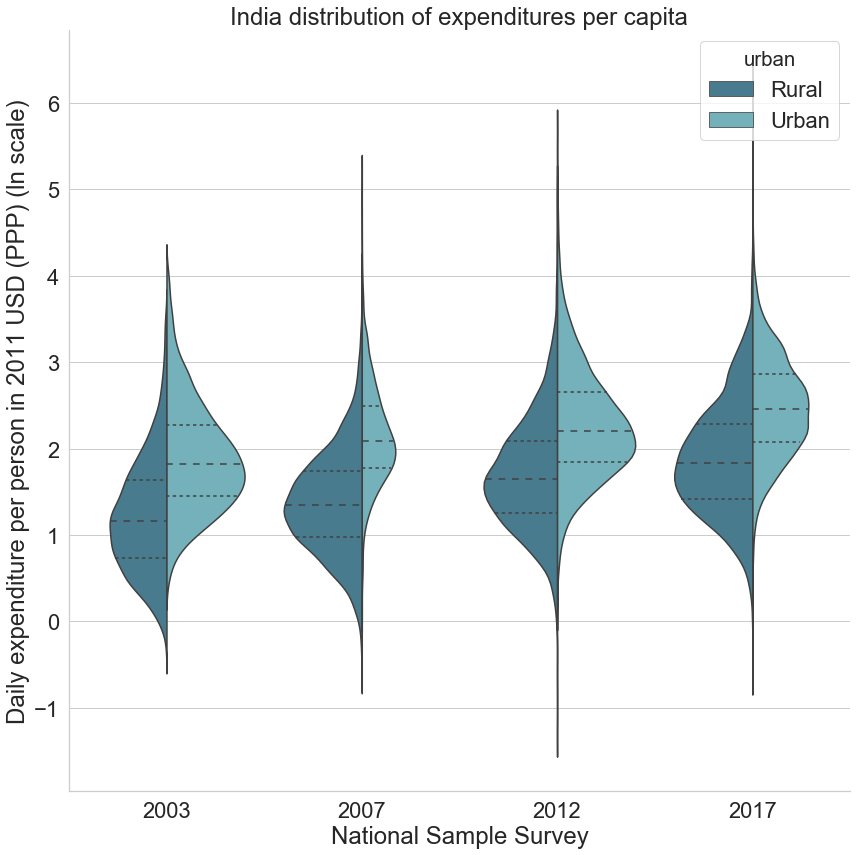

In [24]:
df_ind = df.loc[(df.country =='IND') & (df.relationharm =='Head of household')]
df_ind = df_btn.sort_values(by='urban')

f, ax = plt.subplots(figsize=(14, 14))

sns.set(style="whitegrid",font_scale=2)

sns.violinplot(y="ln_welfare", 
               x="year", 
               hue = 'urban',
               data = df_ind, 
               palette = "GnBu_d",
               scale = 'count',
               split = True,
               inner = "quart") # or, None, or "box", or "quartile"

sns.despine(left=False)
plt.xlabel('National Sample Survey')
plt.ylabel('Daily expenditure per person in 2011 USD (PPP) (ln scale)')
plt.title('India distribution of expenditures per capita')
plt.savefig("india_violins.png")

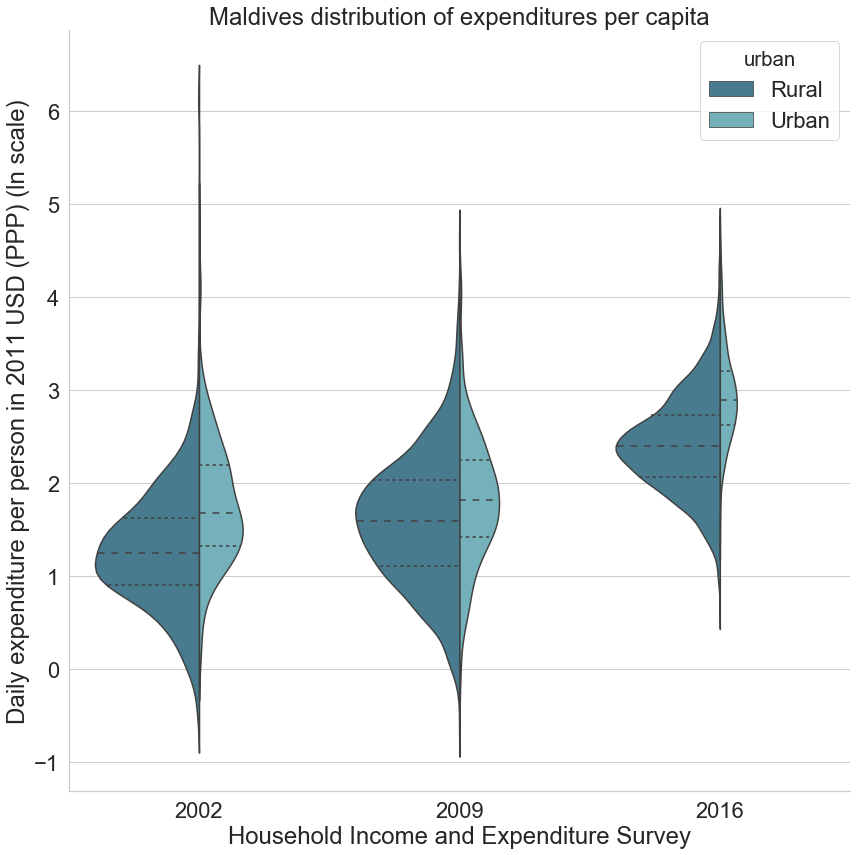

In [25]:
df_mdv = df.loc[(df.country =='MDV') & (df.relationharm =='Head of household')]
df_mdv = df_mdv.sort_values(by='urban')

f, ax = plt.subplots(figsize=(14, 14))

sns.set(style="whitegrid",font_scale=2)

sns.violinplot(y="ln_welfare", 
               x="year", 
               hue = 'urban',
               data = df_mdv, 
               palette = "GnBu_d",
               scale = 'count',
               split = True,
               inner = "quart") # or, None, or "box", or "quartile"

sns.despine(left=False)
plt.xlabel('Household Income and Expenditure Survey')
plt.ylabel('Daily expenditure per person in 2011 USD (PPP) (ln scale)')
plt.title('Maldives distribution of expenditures per capita')
plt.savefig("maldives_violins.png")

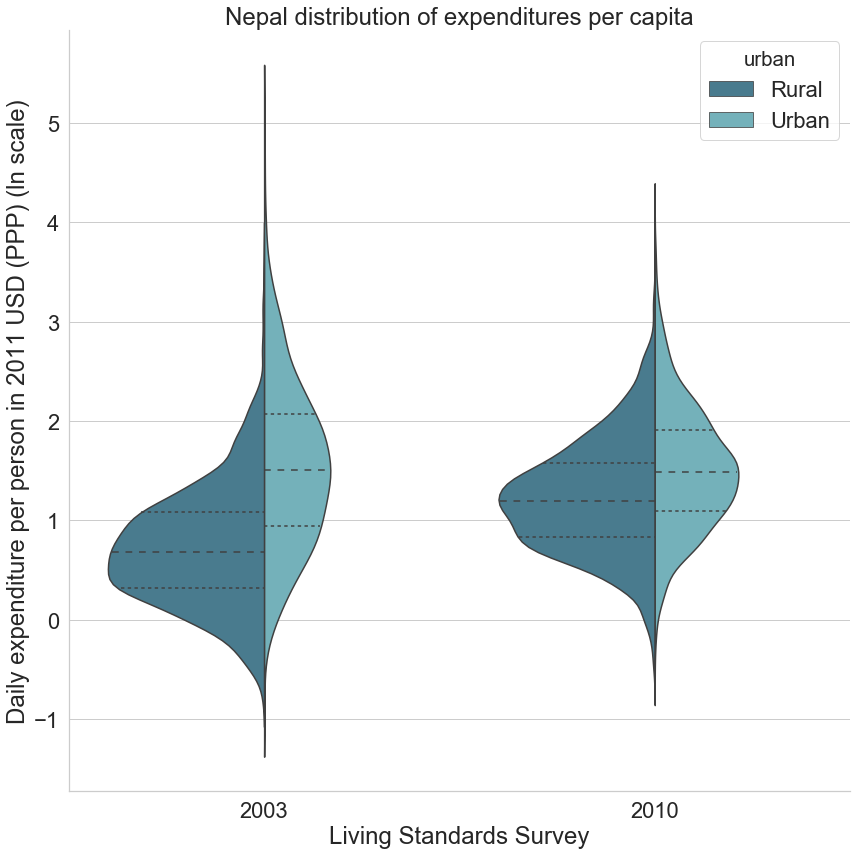

In [26]:
df_npl = df.loc[(df.country =='NPL') & (df.relationharm =='Head of household')]
df_npl = df_npl.sort_values(by='urban')

f, ax = plt.subplots(figsize=(14, 14))

sns.set(style="whitegrid",font_scale=2)

sns.violinplot(y="ln_welfare", 
               x="year", 
               hue = 'urban',
               data = df_npl, 
               palette = "GnBu_d",
               scale = 'count',
               split = True,
               inner = "quart") # or, None, or "box", or "quartile"

sns.despine(left=False)
plt.xlabel('Living Standards Survey')
plt.ylabel('Daily expenditure per person in 2011 USD (PPP) (ln scale)')
plt.title('Nepal distribution of expenditures per capita')
plt.savefig("nepal_violins.png")

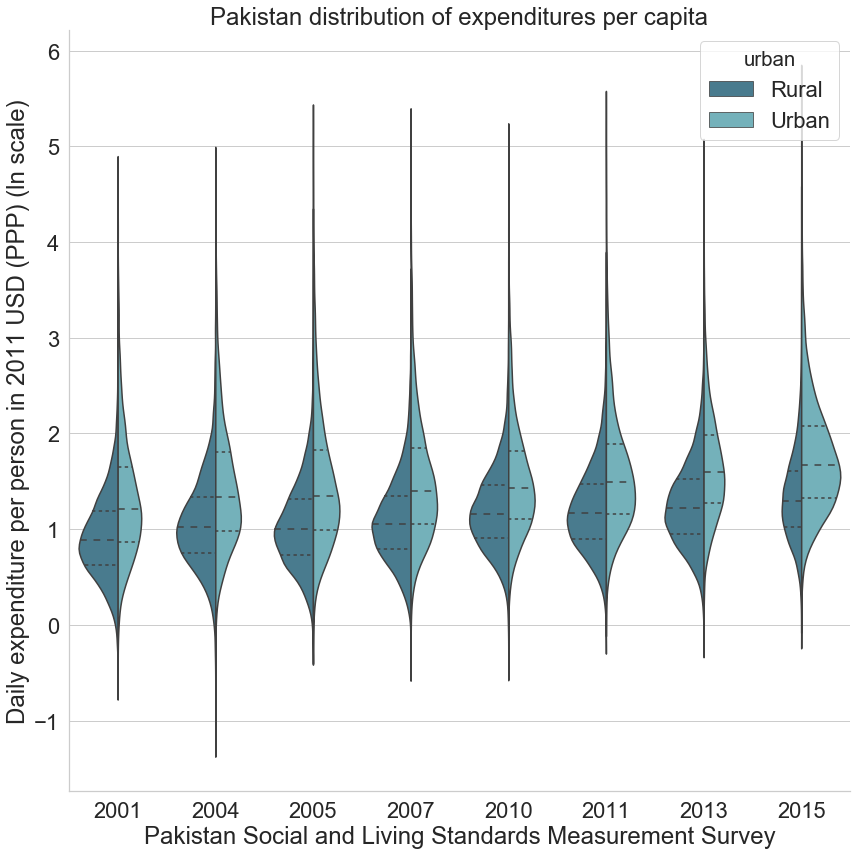

In [27]:
df_pak = df.loc[(df.country =='PAK') & (df.relationharm =='Head of household')]
df_pak = df_pak.sort_values(by='urban')

f, ax = plt.subplots(figsize=(14, 14))

sns.set(style="whitegrid",font_scale=2)

sns.violinplot(y="ln_welfare", 
               x="year", 
               hue = 'urban',
               data = df_pak, 
               palette = "GnBu_d",
               scale = 'count',
               split = True,
               inner = "quart") # or, None, or "box", or "quartile"

sns.despine(left=False)
plt.xlabel('Pakistan Social and Living Standards Measurement Survey')
plt.ylabel('Daily expenditure per person in 2011 USD (PPP) (ln scale)')
plt.title('Pakistan distribution of expenditures per capita')
plt.savefig("pakistan_violins.png")

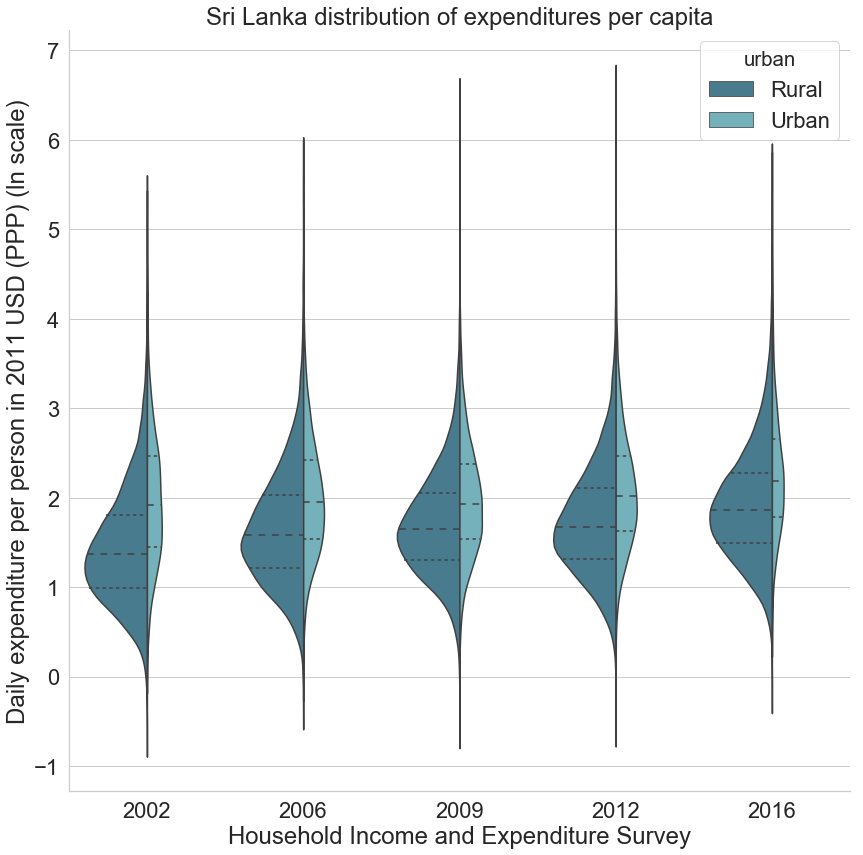

In [28]:
df_lka = df.loc[(df.country =='LKA') & (df.relationharm =='Head of household')]
df_lka = df_lka.sort_values(by='urban')

f, ax = plt.subplots(figsize=(14, 14))

sns.set(style="whitegrid",font_scale=2)

sns.violinplot(y="ln_welfare", 
               x="year", 
               hue = 'urban',
               data = df_lka, 
               palette = "GnBu_d",
               scale = 'count',
               split = True,
               inner = "quart") # or, None, or "box", or "quartile"

sns.despine(left=False)
plt.xlabel('Household Income and Expenditure Survey')
plt.ylabel('Daily expenditure per person in 2011 USD (PPP) (ln scale)')
plt.title('Sri Lanka distribution of expenditures per capita')
plt.savefig("srilanka_violins.png")
